# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# opening file
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # Yandex path
except:
    df = pd.read_csv('real_estate_data.csv', sep='\t') # personal path

In [3]:
# checking general info & identifying NaNs
df.info()

# identifying NaNs
display(round(df.isna().sum() * 100 / len(df), 2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
cityCenters_nearest     23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

In [4]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

- 22 столбца, 23699 строки с данными, при этом, есть пропуски в 14 столбцах
- Преимущественно количественные данные, категориальные данные в столбцах is_apartment, locality_name, open_plan, studio 
- Большое количество пропусков в столбце is_apartment (более 88%), parks_nearest и ponds_nearest (больше 60%) - можно удалить эти столбцы из анализа

## Предобработка данных

In [5]:
# deleting columns useless for the analysis
columns_to_delete = [
    'is_apartment',
    'parks_nearest',
    'ponds_nearest' 
]

for column in columns_to_delete:
    df.drop(column, axis=1, inplace=True)

In [6]:
# replacing NaNs with 0
columns_to_replace = [
    'balcony',
    'airports_nearest',
    'cityCenters_nearest',
    'parks_around3000',  
    'ponds_around3000', 
]
    
for column in columns_to_replace:
    df[column] = df[column].fillna(0)

# deleting rows with floors_total as NaN
df = df.dropna(subset = ['floors_total'])

# replacing locality_name
df['locality_name'] = df['locality_name'].fillna('unknown') 

In [7]:
# converting ceiling_height to numeric and replacing NaNs with median for future sampling

df['ceiling_height'] = pd.to_numeric(df['ceiling_height'], errors='coerce')
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [8]:
# working with locality_name column

df['locality_name'] = df['locality_name'].str.lower()
#df['locality_name'] = df['locality_name'].str.replace('посёлок', 'поселок')

new_names = []
for row in df['locality_name']:
    a = row.split('\n')
    for x in range(0, len(a)):
         new_names.append(a[x].split(' ')[-1])
df['locality_name_new'] = new_names

In [9]:
# changing data type from float to int
columns_to_сhange_type = [
    'floors_total',
    'balcony',
    'airports_nearest',
    'cityCenters_nearest',
    'parks_around3000',
    'ponds_around3000'
]

for column in columns_to_сhange_type:
    df[column] = df[column].astype('int')

# changing date format
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   studio                23613 non-null  bool          
 10  open_plan             23613 non-null  bool          
 11  kitchen_area          21382 non-null  float64       
 12  balcony               23613 non-null  int64         
 13  locality_name   

In [11]:
# checking for duplicates
df.duplicated().sum()

0

### Вывод

- Удалили столбцы is_apartment, parks_nearest и ponds_nearest из таблицы, ибо больше половины данных - пропуски
- В столбцах balcony, airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000 заменили пропуски на 0, ибо скорее всего, они отсутствуют, если не были подтянуты из картографических данных, а в случае ручного ввода не вводились по той же причине
- В столбце locality_name заменили пропуски на значение Unknown, добавили новый столбец с названиями без типа населенного пункта
- В столбце ceiling_height изменили тип данных с object на float, заменили пропуски медианой
- В столбцах floors_total, living_area, kitchen_area, days_exposition оставили пропуски, ибо эти значения нельзя предугадать
- Удалили строки, где нет floors_total - дальше даст возможность поменять тип данных + не повлияет на датасет, ибо всего лишь 0.36% строк
- В столбцах floors_total, balcony, airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000 изменили тип данных с float на integer, ибо эти данные подразумевают целое число
- В столбце first_day_exposition изменили формат для отражения даты
- Дублирующихся строк нет 

## Расчёты и добавление результатов в таблицу

In [12]:
# adding new column for price per sqm
df['price_sqm'] = df['last_price'] / df['total_area']

# adding new columns for day, month & year of advertisment
df['adv_day'] = pd.DatetimeIndex(df['first_day_exposition']).day
df['adv_month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['adv_year'] = pd.DatetimeIndex(df['first_day_exposition']).year

# adding new columns with ratios of living and kitchen areas to total
df['living_area_to_total'] = df['living_area'] / df['total_area']
df['kitchen_area_to_total'] = df['kitchen_area'] / df['total_area'] 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23613 non-null  int64         
 1   last_price             23613 non-null  float64       
 2   total_area             23613 non-null  float64       
 3   first_day_exposition   23613 non-null  datetime64[ns]
 4   rooms                  23613 non-null  int64         
 5   ceiling_height         23613 non-null  float64       
 6   floors_total           23613 non-null  int64         
 7   living_area            21743 non-null  float64       
 8   floor                  23613 non-null  int64         
 9   studio                 23613 non-null  bool          
 10  open_plan              23613 non-null  bool          
 11  kitchen_area           21382 non-null  float64       
 12  balcony                23613 non-null  int64         
 13  l

In [13]:
# defining function to categorize by floor
def floors_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой' 

    
# adding new column with floor category
df['floor_category'] = df.apply(floors_category, axis=1)

In [14]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,ponds_around3000,days_exposition,locality_name_new,price_sqm,adv_day,adv_month,adv_year,living_area_to_total,kitchen_area_to_total,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,NaN,санкт-петербург,120370.370370,7,3,2019,0.472222,0.231481,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,81.0,шушары,82920.792079,4,12,2018,0.460396,0.272277,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,558.0,санкт-петербург,92785.714286,20,8,2015,0.612500,0.148214,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,3,424.0,санкт-петербург,408176.100629,24,7,2015,NaN,NaN,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,121.0,санкт-петербург,100000.000000,19,6,2018,0.320000,0.410000,другой


### Вывод

- Провели расчеты и добавили необходимые столбцы в таблицу (цена квадратного метра, день недели, месяц и год публикации объявления, категория в зависимости от этажа квартиры, соотношение жилой и общей площади, а также отношение площади кухни к общей)


## Исследовательский анализ данных

#### 1. Изучим следущие параметры: площадь, цена, число комнат, высота потолков 

,last_price,total_area,rooms,ceiling_height
count,2.361300e+04,23613.000000,23613.000000,23613.000000
mean,6.540555e+06,60.340678,2.071147,2.724581
std,1.090172e+07,35.648988,1.078380,0.990085
min,1.219000e+04,12.000000,0.000000,1.000000
25%,3.400000e+06,40.000000,1.000000,2.600000
50%,4.650000e+06,52.000000,2.000000,2.650000
75%,6.799000e+06,69.800000,3.000000,2.700000
max,7.630000e+08,900.000000,19.000000,100.000000


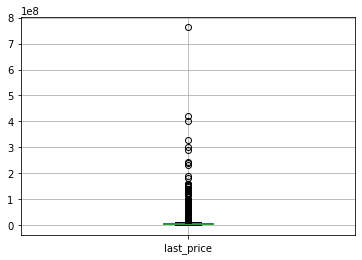

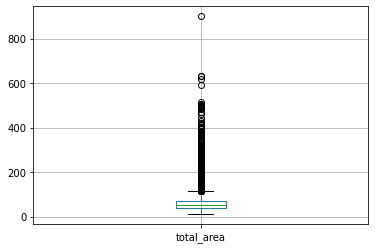

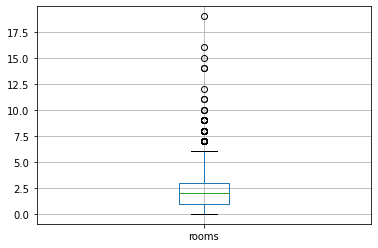

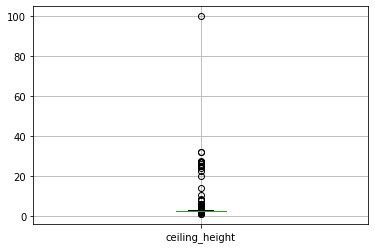

In [15]:
# analysing area, price, rooms, ceiling height
# checking metrics & boxplots

columns_list = ['last_price', 'total_area', 'rooms', 'ceiling_height']
display(df[columns_list].describe())

for column in columns_list:
    df.boxplot(column)
    plt.show()

- По каждой переменной имеется большое количество выбросов, проведем более детальный анализ по каждой переменной, чтобы понять границы выбросов

<AxesSubplot:>

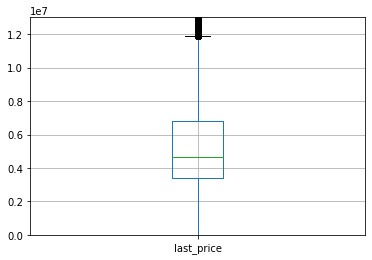

In [16]:
# analysing last_price

plt.ylim(0, 13e+06)
df.boxplot('last_price')

- Укрупненная диаграмма размаха показывает, что можно отбросить значения, где цена больше 12 млн 

<AxesSubplot:>

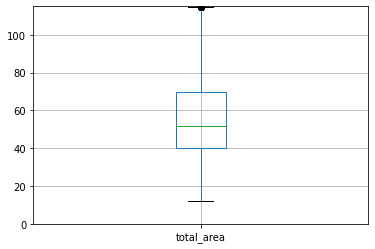

In [17]:
# analysing total_area

plt.ylim(0, 115)
df.boxplot('total_area')

- Укрупненная диаграмма размаха показывает, что можно отбросить значения, где площадь больше 115 кв.м.

<AxesSubplot:>

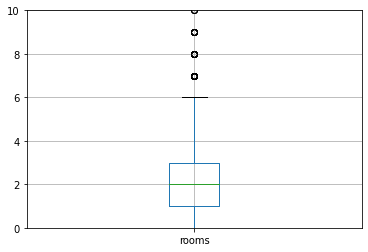

In [18]:
# analysing rooms

plt.ylim(0, 10)
df.boxplot('rooms')

- Укрупненная диаграмма размаха показывает, что можно отбросить значения, где количество комнат больше 6

<AxesSubplot:>

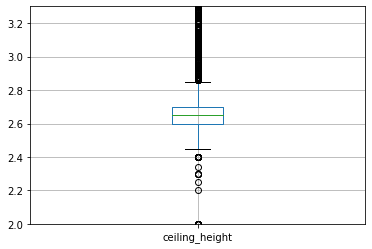

In [19]:
# analysing ceiling_height

plt.ylim(2, 3.3)
df.boxplot('ceiling_height')

- Укрупненная диаграмма размаха показывает, что можно отбросить значения, где высота потолка больше 3.2 метров и меньше 2.2

#### Возможные критерии для среза данных
- last_price <= 12,000,000 
- total_area <= 115
- rooms <= 6
- 2.2 <= ceiling_height <= 3.2

Начнем с цены, по идее при фильтрации по цене автоматически большая часть последующих условий должна выполниться

In [20]:
# creating sample dataframe

sample_df = df.query('last_price <= 12000000')
sample_df[columns_list].describe()

,last_price,total_area,rooms,ceiling_height
count,2.168200e+04,21682.000000,21682.000000,21682.000000
mean,4.877944e+06,53.517765,1.937091,2.699899
std,2.272656e+06,19.397634,0.916821,0.783051
min,1.219000e+04,12.000000,0.000000,1.000000
25%,3.300000e+06,39.000000,1.000000,2.600000
50%,4.400000e+06,49.500000,2.000000,2.650000
75%,6.000000e+06,64.000000,3.000000,2.700000
max,1.200000e+07,230.000000,7.000000,32.000000


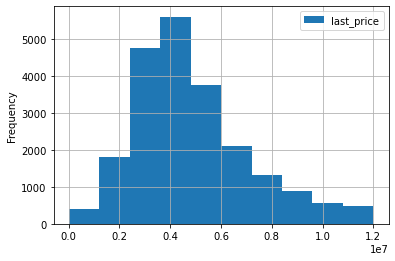

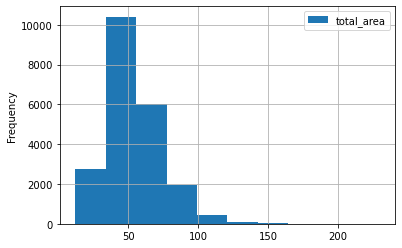

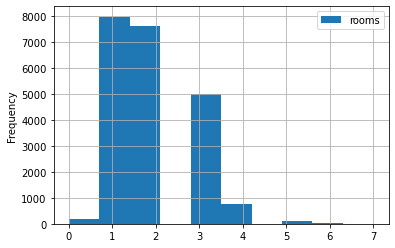

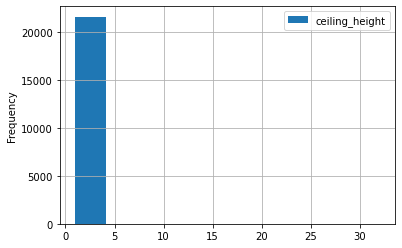

In [21]:
# checking histograms
for column in columns_list:
    sample_df.plot(
        kind='hist',
        y=column,
        bins=10,
        grid=True
    )

Выкинем строки со значениями rooms = 0, далее ceiling_height > 10, далее total_area > 115

In [22]:
# filtering sample 
sample_df = sample_df[(sample_df['rooms'] > 0)]
sample_df = sample_df[(sample_df['ceiling_height'] < 10)]
sample_df = sample_df[(sample_df['total_area'] <= 115)]

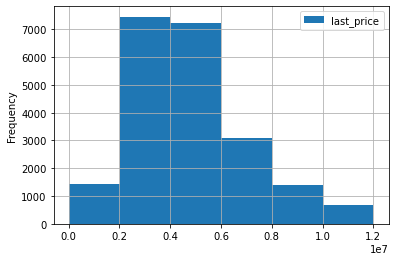

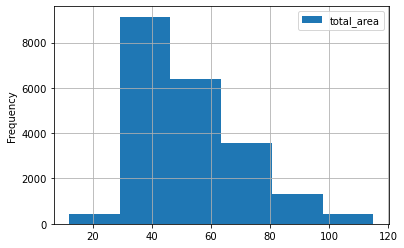

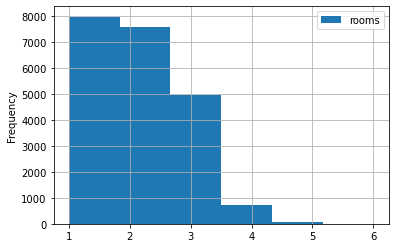

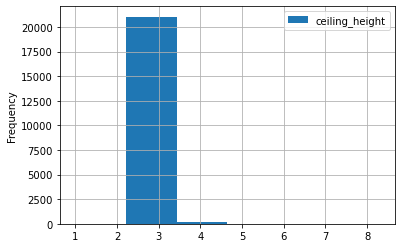

In [23]:
# checking histograms again
for column in columns_list:
    sample_df.plot(
        kind='hist',
        y=column,
        bins=6,
        grid=True
    )

In [24]:
len(sample_df)

21277

Остался сэмпл с 21277 строками, с которым можно продолжить работу, распределения исследуемых переменных также близки к нормальному (last_price, total_area) и Пуассона (rooms, ceiling_height) 

#### 2. Изучим время продажи квартиры

count    18670.000000
mean       172.926995
std        210.678511
min          1.000000
25%         44.000000
50%         92.000000
75%        219.000000
max       1580.000000
Name: days_exposition, dtype: float64

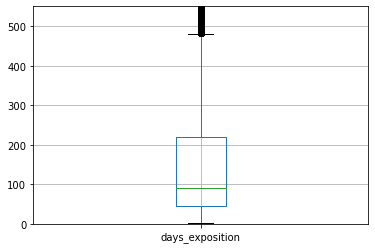

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

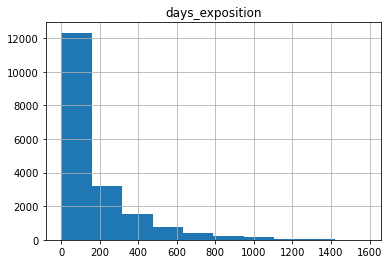

In [25]:
# analysing days_exposition - checking metrics & boxplot

display(sample_df['days_exposition'].describe())
plt.ylim(0, 550)
sample_df.boxplot('days_exposition')
plt.show()
sample_df.hist('days_exposition')

- Из диаграммы размаха и гистограммы видно, что присутствует большое количество выбросов
- 50% данных сосредоточено в промежутке до 97 дней, среднее значение завышено (217) из-за потенциальных выбросов (значения, выше 550 дней)
- Значения меньше 44 дней можно считать очень быстрыми, при этом значения, более 232 - довольно долгими. Слишком долгими будем считать значения выше 550 (отбросим их)

In [26]:
# dropping days_expostion over 550

sample_df = sample_df.query('days_exposition <= 550')

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

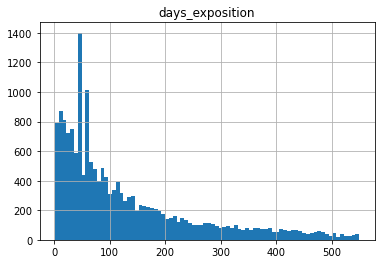

In [27]:
# checking histogram

sample_df.hist('days_exposition', bins=80)

#### 3. Какие факторы больше всего влияют на стоимость квартиры?

In [28]:
# last_price correlation with other factors

corr_matrix = sample_df.corr()
corr_matrix['last_price'].sort_values()

kitchen_area_to_total   -0.120626
studio                  -0.022992
adv_day                 -0.005309
adv_year                 0.005102
open_plan                0.006481
adv_month                0.009071
living_area_to_total     0.031212
days_exposition          0.045352
balcony                  0.085066
cityCenters_nearest      0.094751
floor                    0.141805
total_images             0.156507
floors_total             0.204433
parks_around3000         0.243324
ponds_around3000         0.283868
ceiling_height           0.303413
airports_nearest         0.321840
rooms                    0.439822
kitchen_area             0.479510
living_area              0.577950
price_sqm                0.626049
total_area               0.705565
last_price               1.000000
Name: last_price, dtype: float64

Относительно высокая корреляция прослеживается со следующими факторами - total_area, living_area (зависим от предыдущего). Корреляция с price_sqm очевидна, ибо используется в расчете этого показателя, фактор нет смысла учитывать.

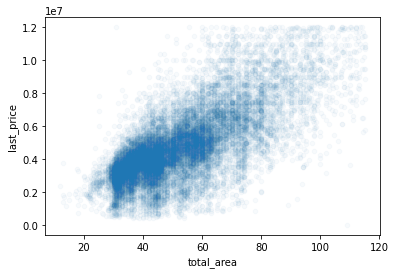

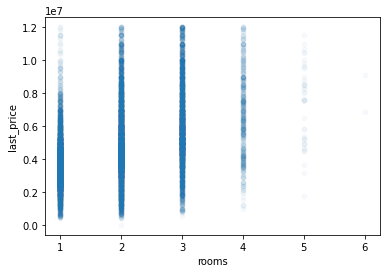

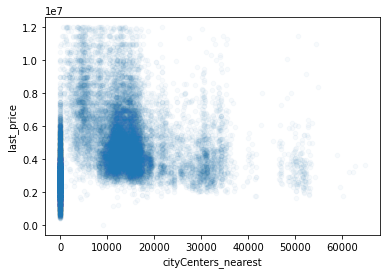

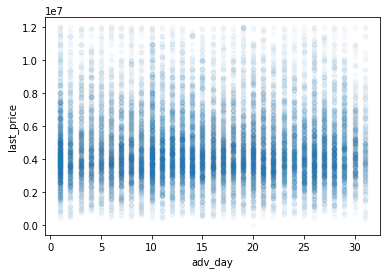

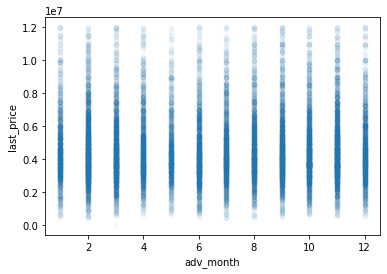

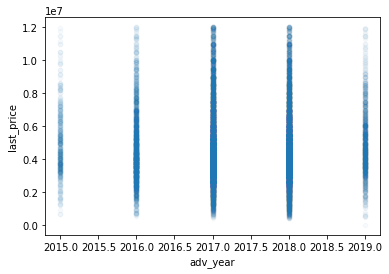

In [29]:
# correlation with total_area, rooms, cityCenters_nearest, adv_day, adv_month, adv_year

factors_to_check = ['total_area', 'rooms', 'cityCenters_nearest', 'adv_day', 'adv_month', 'adv_year']

for factor in factors_to_check:
    sample_df.plot(x=factor, y='last_price', kind='scatter', alpha=0.03)
    plt.show

Диаграммы рассеивания подвердают результаты корреляционной матрицы - нет зависимости от количества комнат, удаленности от центра, даты размещения: дня недели, месяца и года.
Видна зависимость от площади

<AxesSubplot:title={'center':'Average price per floor category'}, xlabel='floor_category'>

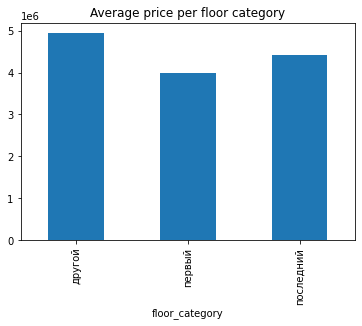

In [30]:
# checking relationship with floor_category

(
    sample_df.pivot_table(index = 'floor_category', values = 'last_price')
    .plot(
        kind='bar',
        legend=False,
        title='Average price per floor category',
    )
)

Средняя цена на первом этаже ниже, чем на всех остальных

#### 4. 10 населённых пунктов с наибольшим числом объявлений

In [31]:
# selecting 10 localities with biggest number of announcements

(
    sample_df.pivot_table(
        index = 'locality_name_new', 
        values = ['first_day_exposition', 'price_sqm'], 
        aggfunc = {"first_day_exposition": 'count', "price_sqm": 'mean'}
        )
    .sort_values('first_day_exposition', ascending = False)
    .head(10)
    .sort_values('price_sqm', ascending=False)
)                                                                           

,first_day_exposition,price_sqm
locality_name_new,,
санкт-петербург,11193,104517.725454
пушкин,262,99229.344697
кудрово,391,94272.212200
парголово,285,89490.308724
мурино,494,85269.841181
шушары,383,77539.229655
колпино,292,74532.870057
гатчина,243,68346.692563
всеволожск,302,66781.167891


Наибольшее количество объявлений в Санкт-Петербурге, там же и самая высокая стоимость жилья. Выборг входит в десятку населенных пунктов по количеству объявлений, стоимость жилья там наименьшая из выборки. 

#### 5. Идентификация центра Санкт-Петербурга по цене за кв.м.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

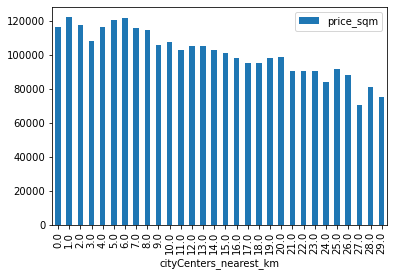

In [32]:
# filtering apartments in spb

spb_apts = sample_df.query('locality_name == "санкт-петербург"')

# adding new column with distance to centre in km

spb_apts['cityCenters_nearest_km'] = round(spb_apts['cityCenters_nearest'] / 1000,0)

# grouping by km and calculating avg price_sqm

(
    spb_apts.pivot_table(
        index = 'cityCenters_nearest_km', 
        values = 'price_sqm', 
        )
    .plot(y='price_sqm', kind='bar')
)   

#### 6. Анализ центральной зоны СПб


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,ponds_around3000,days_exposition,price_sqm,adv_day,adv_month,adv_year,living_area_to_total,kitchen_area_to_total,cityCenters_nearest_km
count,2137.000000,2.137000e+03,2137.000000,2137.000000,2137.000000,2137.000000,1985.000000,2137.000000,1941.000000,2137.000000,...,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,1985.000000,1941.000000,2137.000000
mean,9.523631,7.117304e+06,62.927010,2.224146,2.842644,7.651848,36.831526,4.284979,10.913879,0.309312,...,0.905943,1.219467,143.777726,117101.180967,15.137576,6.681797,2017.285915,0.575187,0.182766,5.193730
std,5.665333,2.234495e+06,20.786376,0.928541,0.304520,4.573627,15.436582,3.187893,4.682819,0.711247,...,0.879994,1.061338,133.209203,29559.631386,8.603021,3.422881,0.877919,0.109650,0.077147,2.022092
min,0.000000,1.600000e+06,12.000000,1.000000,2.400000,2.000000,2.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,3.000000,17391.304348,1.000000,1.000000,2015.000000,0.038462,0.060606,0.000000
25%,5.000000,5.400000e+06,46.000000,2.000000,2.650000,5.000000,25.000000,2.000000,8.000000,0.000000,...,0.000000,0.000000,41.000000,96045.197740,8.000000,3.000000,2017.000000,0.510638,0.129487,4.000000
50%,9.000000,6.900000e+06,61.000000,2.000000,2.650000,6.000000,35.000000,4.000000,10.000000,0.000000,...,1.000000,1.000000,94.000000,112096.774194,15.000000,7.000000,2017.000000,0.588525,0.162698,5.000000
75%,13.000000,8.700000e+06,77.760000,3.000000,3.000000,9.000000,47.000000,5.000000,12.900000,0.000000,...,1.000000,2.000000,211.000000,133689.839572,22.000000,10.000000,2018.000000,0.653944,0.216783,7.000000
max,32.000000,1.200000e+07,115.000000,6.000000,5.300000,28.000000,87.000000,23.000000,48.300000,5.000000,...,3.000000,3.000000,549.000000,387096.774194,31.000000,12.000000,2019.000000,0.972222,0.572079,8.000000


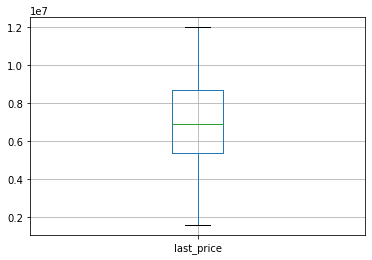

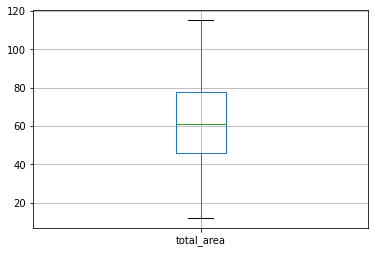

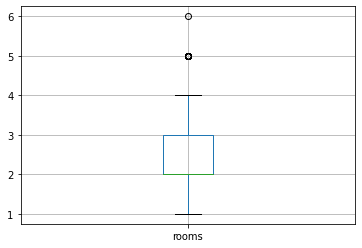

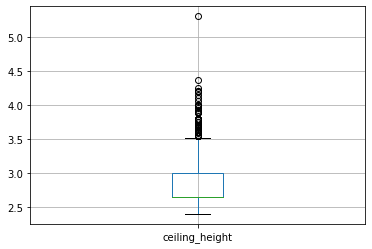

In [33]:
# spb city centre sample analysis

spb_apts_centre = spb_apts.query('cityCenters_nearest_km <=8')
display(spb_apts_centre.describe())

for column in columns_list:
    spb_apts_centre.boxplot(column)
    plt.show()

- 1309 квартир в центре
- Большая часть квартир от 1 до 4 комнат
- Есть выбросы по высоте потолка, большая часть квартир с 2.2 - 3.8 метров

In [34]:
# correlation matrix

spb_corr_df = spb_apts_centre.corr()
spb_corr_df['last_price'].sort_values()

cityCenters_nearest_km   -0.168148
cityCenters_nearest      -0.165060
kitchen_area_to_total    -0.095193
studio                   -0.025350
adv_day                  -0.009963
adv_year                 -0.002450
adv_month                -0.000645
living_area_to_total      0.000639
airports_nearest          0.021685
open_plan                 0.022369
balcony                   0.080818
total_images              0.086526
parks_around3000          0.087445
ponds_around3000          0.107966
floors_total              0.108736
days_exposition           0.120549
floor                     0.147279
ceiling_height            0.202651
price_sqm                 0.302670
rooms                     0.442760
kitchen_area              0.457067
living_area               0.567897
total_area                0.713560
last_price                1.000000
Name: last_price, dtype: float64

Центр Санкт-Петербурга не отличается от основного датасета по факторам, влияющим на стоимость квартиры - общая площадь и жилая площадь имеют высокую корреляцию с ценой, в то время как число комнат влияет на цену слабее, этаж и удалённость от центра практически не влияют на цену, дата размещения объявления абсолютно не играет никакой роли

## Общий вывод

- В ходе анализа было выявлено, что основные факторы, которые влияют на стоимость квартиры - общая и жилая площадь
- Число комнат очень слабо влияет на цену, этаж и удалённость от центра практически не влияют на цену, при этом дата размещения объявления абсолютно не играет никакой роли
- Наибольшее количество объявлений в Санкт-Петербурге, там же и самая высокая стоимость жилья 
- Из топ-10 населенных пунктов по количеству объявлений, стоимость жилья в Выборге наименьшая 
- Центр Санкт-Петербурга не отличается от основного датасета по факторам, влияющим на стоимость квартиры - общая площадь и жилая площадь имеют высокую корреляцию с ценой, в то время как число комнат влияет на цену слабее, этаж и удалённость от центра практически не влияют на цену, дата размещения объявления абсолютно не играет никакой роли